# Project : PyTorch 실습
### 제출일 : 2023.05.30
### 성명 및 학번 : 오혜민(2023254013)

In [38]:
'''
!pip install torchtext==0.11.0
!pip install --upgrade torch torchvision

import numpy as np
import torch
from torch.autograd import Variable
import torchvision
import torchtext

print(f'torch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')
print(f'torchtext version: {torchtext.__version__}')
'''

"\n!pip install torchtext==0.11.0\n!pip install --upgrade torch torchvision\n\nimport numpy as np\nimport torch\nfrom torch.autograd import Variable\nimport torchvision\nimport torchtext\n\nprint(f'torch version: {torch.__version__}')\nprint(f'torchvision version: {torchvision.__version__}')\nprint(f'torchtext version: {torchtext.__version__}')\n"

## 1. Colab에서 PyTorch 실행

In [39]:
#-*- coding: utf-8 -*-

In [40]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist.data/255
y = mnist.target

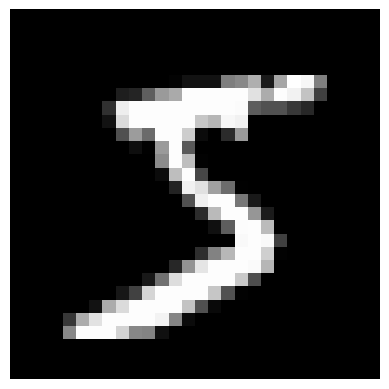

이미지 레이블 : 5


In [41]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
'''
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")

'''
plt.imshow(X[0].reshape(28,28), cmap='gray')

plt.axis("off")
plt.show()
print("이미지 레이블 : {}".format(y[0]))

## 2. PyTorch의 MLP 프로그래밍

In [42]:
#-*- coding: utf-8 -*-

In [43]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist.data/255
y = mnist.target

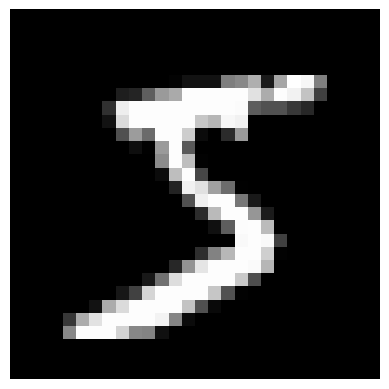

이미지 레이블 : 5


In [44]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.axis("off")
plt.show()
print("이미지 레이블 : {}".format(y[0]))

In [45]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=0) 
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(list(map(int, y_train)))
y_test = torch.LongTensor(list(map(int, y_test)))

In [47]:
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

In [48]:
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [49]:
from torch import nn
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100)) #모델 구성
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100,100))
model.add_module('relu2', nn.ReLU()) 
model.add_module('fc3', nn.Linear(100,10))

In [50]:
from torch import optim 
loss_fn = nn.CrossEntropyLoss() #손실 함수
optimizer = optim.Adam(model.parameters( ), lr=0.01)

시작 정확도: 1079/10000(10.79%)
에포크 0: 완료
학습중 정확도: 9470/10000(94.70%)
에포크 1: 완료
학습중 정확도: 9598/10000(95.98%)
에포크 2: 완료
학습중 정확도: 9595/10000(95.95%)
학습 후 정확도: 9595/10000(95.95%)
10번째 학습데이터의 테스트 결과 : tensor([ 2.0844, 11.1080, -8.6455, -5.7945, -5.2159, -4.3143, -8.6585,  0.2686,
         2.5298,  0.1157], grad_fn=<AddBackward0>)
10번째 학습데이터의 테스트 예측 : 1
실제 레이블:1


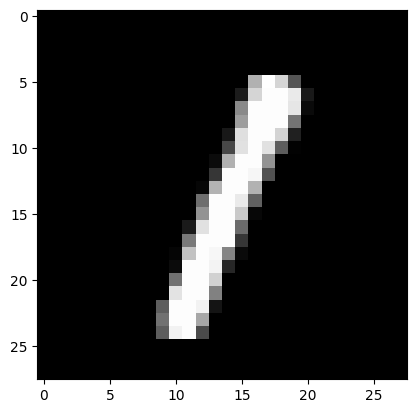

In [51]:
def train(epoch):
    model.train() #학습 모드로 변환
    for data, targets in loader_train: 
        optimizer.zero_grad() #그레디언트 초기화
        output = model(data)
        loss = loss_fn(output, targets) #outputs를 output으로 수정함 2023.05.29
        loss.backward() 
        optimizer.step()
    print('에포크 {}: 완료'.format(epoch))
    
def test(head):
    model.eval() #테스트 모드로 변환
    correct = 0
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    data_num = len(loader_test.dataset)
    print('{} 정확도: {}/{}({:.2f}%)'.format(head, correct, data_num, 100.*correct/data_num)) # of를 2f로 수정함 2023.05.29

test('시작')
for epoch in range(3):
    train(epoch)
    test('학습중')
test('학습 후')

index = 10 #테스트 데이터 중에서 확인해볼 데이터의 인덱스
model.eval() #모델 테스트 모드로 전환
data = X_test[index]
output = model(data) #모델 적용
print('{}번째 학습데이터의 테스트 결과 : {}'.format(index,output))
_, predicted = torch.max(output.data, 0)
print('{}번째 학습데이터의 테스트 예측 : {}'.format(index,predicted))
X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print('실제 레이블:{}'.format(y_test[index]))

## 3. CNN 모델을 이용한 MNIST 데이터 분류

In [94]:
#-*- coding: utf-8 -*-

In [95]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist.data
y = mnist.target

In [96]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train.astype(int))
y_test = torch.LongTensor(y_test.astype(int))

In [98]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

In [99]:
X_train = X_train.view(-1, 1, 28, 28).float()
X_test = X_test.view(-1, 1, 28, 28).float()
print(X_train.shape)
print(X_test.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [100]:
train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)
BATCH_SIZE = 32
loader_train = DataLoader(train, batch_size=BATCH_SIZE, shuffle=False)
loader_test = DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

In [101]:
'''
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
'''

"\ntorch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')\n"

In [102]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

        self.loss_fn = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1, 3*3*64)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [103]:
def fit(model, loader_train):
    optimizer = torch.optim.Adam(model.parameters())
    error = nn.CrossEntropyLoss()
    EPOCHS = 10
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(loader_train):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()
            predicted = torch.max(output.data, 1)[1]
            correct += (predicted == var_y_batch).sum()
            if batch_idx % 50 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(X_batch), len(loader_train.dataset),
                    100.*batch_idx / len(loader_train), loss.data.item(), float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))


In [104]:
def evaluate(model):
    correct = 0
    for test_imgs, test_labels in loader_test:
        test_imgs = Variable(test_imgs).float()
        output = model(test_imgs)
        predicted = torch.max(output, 1)[1]
        correct += (predicted == test_labels).sum()
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(loader_test)*BATCH_SIZE)))

In [105]:
cnn = CNN()
evaluate(cnn)
fit(cnn, loader_train)
cnn.eval()
evaluate(cnn)

Test accuracy:0.101% 
Epoch : 0 [0/60000 (0%)]	Loss: 19.909086	 Accuracy:9.375%
Epoch : 0 [1600/60000 (3%)]	Loss: 2.058422	 Accuracy:15.012%
Epoch : 0 [3200/60000 (5%)]	Loss: 1.537113	 Accuracy:29.981%
Epoch : 0 [4800/60000 (8%)]	Loss: 0.997362	 Accuracy:41.494%
Epoch : 0 [6400/60000 (11%)]	Loss: 0.577645	 Accuracy:48.881%
Epoch : 0 [8000/60000 (13%)]	Loss: 1.017035	 Accuracy:55.242%
Epoch : 0 [9600/60000 (16%)]	Loss: 0.732274	 Accuracy:60.008%
Epoch : 0 [11200/60000 (19%)]	Loss: 0.762013	 Accuracy:63.791%
Epoch : 0 [12800/60000 (21%)]	Loss: 0.634818	 Accuracy:66.716%
Epoch : 0 [14400/60000 (24%)]	Loss: 0.671219	 Accuracy:68.902%
Epoch : 0 [16000/60000 (27%)]	Loss: 0.181993	 Accuracy:70.877%
Epoch : 0 [17600/60000 (29%)]	Loss: 0.350297	 Accuracy:72.351%
Epoch : 0 [19200/60000 (32%)]	Loss: 0.379039	 Accuracy:73.799%
Epoch : 0 [20800/60000 (35%)]	Loss: 0.187426	 Accuracy:75.086%
Epoch : 0 [22400/60000 (37%)]	Loss: 0.240783	 Accuracy:76.221%
Epoch : 0 [24000/60000 (40%)]	Loss: 0.292873	 A

In [106]:
index = 10
data = X_test[index].view(-1, 1, 28, 28).float()
output = cnn(data)
print('{} 번째 학습데이터의 테스트 결과 : {}'.format(index, output))
_, predict = torch.max(output, 1)
print('{} 번째 데이터의 예측 : {}'.format(index, predict.numpy()))
print('{} 번째 데이터의 실제값 : {}'.format(index, y_test[index]))

10 번째 학습데이터의 테스트 결과 : tensor([[-2.1293e+01, -5.9605e-07, -1.6726e+01, -2.5848e+01, -1.5562e+01,
         -1.8650e+01, -1.8114e+01, -1.8724e+01, -1.4555e+01, -1.8872e+01]],
       grad_fn=<LogSoftmaxBackward0>)
10 번째 데이터의 예측 : [1]
10 번째 데이터의 실제값 : 1
